In [46]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture



In [2]:
#commented out code for creating the data.csv file

"""american = np.mean(np.load(r"one-speaker-vectors-master/american_speaker_01.files.npy"), axis=2)
australian = np.mean(np.load(r"one-speaker-vectors-master/australian_speaker_01.files.npy"), axis=2)
british = np.mean(np.load(r"one-speaker-vectors-master/british_speaker_01.files.npy"), axis=2)
indian = np.mean(np.load(r"one-speaker-vectors-master/indian_speaker_01.files.npy"), axis=2)
bangla = np.mean(np.load(r"one-speaker-vectors-master/bangla_speaker_01.files.npy"), axis=2)
malayalam = np.mean(np.load(r"one-speaker-vectors-master/malayalam_speaker_01.files.npy"), axis=2)
odiya = np.mean(np.load(r"one-speaker-vectors-master/odiya_speaker_01.files.npy"), axis=2)
telugu = np.mean(np.load(r"one-speaker-vectors-master/telugu_speaker_01.files.npy"), axis=2)
welsh = np.mean(np.load(r"one-speaker-vectors-master/welsh_speaker_01.files.npy"), axis=2)

american_df = pd.DataFrame(american)
american_df["label"] = "american"
australian_df = pd.DataFrame(australian)
australian_df["label"] = "australian"
british_df = pd.DataFrame(british)
british_df["label"] = "british"
indian_df = pd.DataFrame(indian)
indian_df["label"] = "indian"
bangla_df = pd.DataFrame(bangla)
bangla_df["label"] = "bangla"
malayalam_df = pd.DataFrame(malayalam)
malayalam_df["label"] = "malayalam"
odiya_df = pd.DataFrame(odiya)
odiya_df["label"] = "odiya"
telugu_df = pd.DataFrame(telugu)
telugu_df["label"] = "telugu"
welsh_df = pd.DataFrame(welsh)
welsh_df["label"] = "welsh"

data = pd.concat([american_df, australian_df, british_df, indian_df, bangla_df, malayalam_df, odiya_df, telugu_df, welsh_df], ignore_index=True)
data.to_csv("data.csv", index=True)"""
#stacked = np.vstack((american, australian, british, indian, bangla, malayalam, odiya, telugu, welsh))
#stacked.shape

'american = np.mean(np.load(r"one-speaker-vectors-master/american_speaker_01.files.npy"), axis=2)\naustralian = np.mean(np.load(r"one-speaker-vectors-master/australian_speaker_01.files.npy"), axis=2)\nbritish = np.mean(np.load(r"one-speaker-vectors-master/british_speaker_01.files.npy"), axis=2)\nindian = np.mean(np.load(r"one-speaker-vectors-master/indian_speaker_01.files.npy"), axis=2)\nbangla = np.mean(np.load(r"one-speaker-vectors-master/bangla_speaker_01.files.npy"), axis=2)\nmalayalam = np.mean(np.load(r"one-speaker-vectors-master/malayalam_speaker_01.files.npy"), axis=2)\nodiya = np.mean(np.load(r"one-speaker-vectors-master/odiya_speaker_01.files.npy"), axis=2)\ntelugu = np.mean(np.load(r"one-speaker-vectors-master/telugu_speaker_01.files.npy"), axis=2)\nwelsh = np.mean(np.load(r"one-speaker-vectors-master/welsh_speaker_01.files.npy"), axis=2)\n\namerican_df = pd.DataFrame(american)\namerican_df["label"] = "american"\naustralian_df = pd.DataFrame(australian)\naustralian_df["label

In [5]:
data = pd.read_csv("data.csv", index_col=0)
data

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,label
0,-18.542814,-18.668093,-18.668093,-18.668093,-18.668093,-18.657626,-0.690188,5.438274,1.227493,4.616696,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,american
1,-17.233382,-17.358661,-17.358661,-17.358661,-17.358661,-16.581489,1.511105,5.112031,1.283484,4.130621,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,american
2,-18.296087,-18.421367,-18.421367,-18.421367,-18.421367,-18.421367,-16.046306,1.353363,3.334118,2.519160,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,american
3,-18.343959,-18.469239,-18.469239,-18.469239,-18.469239,-18.469216,-3.172947,2.963999,3.899948,2.573710,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,american
4,-16.493662,-16.618942,-16.618942,-16.618942,-16.618942,-16.618942,-15.462523,1.110224,2.803240,3.514306,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,american
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6747,-15.896701,-16.021980,-16.021980,-16.021980,-16.021980,-16.021980,-4.314925,4.896566,-0.156977,2.280749,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,welsh
6748,-14.477679,-14.602958,-14.602958,-14.602958,-13.442442,2.399502,0.252279,5.188976,4.004814,0.993135,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,welsh
6749,-18.712138,-18.837418,-18.837418,-18.837418,-18.837418,-17.674723,2.650987,2.877205,-0.687073,3.569870,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,welsh
6750,-14.587930,-14.713209,-14.713209,-14.713209,-14.693734,1.604762,2.236519,3.753760,4.607415,0.395305,...,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.303325,4.290593,welsh


In [49]:
print(silhouette_score(umap_data, kmeans.labels_))
print(adjusted_rand_score(y_train, kmeans.labels_))

0.6011112
0.5491922148985133


# Insert title here

# Names
- Alexandra Hernandez
- Colin Kavanagh
- Lily Qiu

# Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents 
- the solution/what you did
- major results you came up with (mention how results are measured) 

__NB:__ this final project form is much more report-like than the proposal and the checkpoint. Think in terms of writing a paper with bits of code in the middle to make the plots/tables

# Background

Unsupervised learning has allowed us to do many things, such as detect anomalies or allow computers to see and analyze images. A typical application of unsupervised learning is when it comes to natural language processing. For example, researchers used unsupervised learning techniques to teach machines to find patterns<a id="noteone"></a>[<sup>[1]</sup>](#onenote). They used an algorithm called Automatic Distillation of Structure, which they used to teach a machine various things, from languages to protein sequencing. However, most of the inputs into the model they used were text data instead of audio data. Another group of researchers explored various unsupervised methods for teaching a machine natural language <a id="notetwo"></a>[<sup>[2]</sup>](#twonote). This research examined and compared how machines learn to how humans learn languages. However, the author states that the unsupervised approach to machines learning language is not well studied, and there is still a lot of research to do about the approach. Finally, another research group attempted to use unsupervised learning to detect variations in English accents <a id="notethree"></a>[<sup>[3]</sup>](#threenote).However, this research only accounted for accents localized to the United Kingdom. It did not account for accented English in other parts of the world. Also, many of the excerpts were, on average, 43 seconds long, and we would like to see if we can detect accents with less data. While these previous research ventures achieved excellent results, many did not consider the breadth of accented speech worldwide and their nuances. We want to explore accented English globally because it is more applicable to general human speech and nuances, which could be applied to speech recognition programs only trained in American English. 

# Problem Statement

Determining where someone is from can be important information in social contexts. Many people’s worldviews and norms are shaped by their origin and other aspects of their identity. While this may be subtle in our everyday lives, these differences are substantial in communication and understanding each other. As we transform our society into a more interconnected one through technologies like the internet, it becomes more and more imperative to understand unfamiliar cultures.<br>
As a human being, it can be easy to determine whether someone’s accent is similar to our own through learned experience. Even if we can’t pinpoint exactly where someone is from, we can notice and understand that someone’s worldview and experiences may differ. Humans can account for these differences through changes in behavior to account for another person’s experiences. <br>
However, as we rely on artificial intelligence to take over more and more occupations, there is a concern regarding professions that depend on a “human touch” to succeed. An example of this is replacing customer service jobs with robots, which has resulted in mass dissatisfaction among those who use the service. This is compared to humans who understand emotions, the scope of a problem, and “people first service.” Currently, we are not focusing on this “human-computer interaction”. <br>
Our project proposes to solve a vital step in human-computer interaction, which involves understanding people as people instead of problems that need to be solved. In this project, we aim to determine where someone is from via samples of their accented English. We propose doing this through various unsupervised machine-learning clustering methods. Our solution can be applied to human-computer interaction problems to help computers better understand the people they are helping in the context of their cultural norms and beliefs. This project can be quantified by properly encoding audio files into vectors through the wave2vec library. The success of our methods can be quantified through metrics like purity and the Rand Index for matching predicted clusters with their true label. 

# Data
The dataset that's going to be used in this project is the **Common Voice** dataset created by [mozilla.org](https://commonvoice.mozilla.org/en/datasets), and contains 10 variables, with a total of 90,474 observations. The dataset contains speech data read by the site's users, and is made up of audio clips from the users. The entire dataset is divided into two groups: "valid" and "other". In order for an observation to fall under the "valid" group, the audio clip must have had at least 2 listeners, and the majority of those listeners classify it with the audio matching the speech text it's read from. If an observation doesn't fulfill this criteria, it falls under "other". Though the observations will be evaluated equally in this project, it's important to note that some may hold higher weight in the algorithms than others. </br>

In the dataset, each observation includes `filename`,`text`,`up-votes`,`down-votes`,`age`,`gender`, and `accent`; however, in this project, the critical variables are `accent`, `up-votes`, and `down-votes`, since the aim is to cluster common voices based on their accent/locale. These critical variables are represented in the dataset by the user's reported region (e.g. "United States English"), the number of users who said that the speaker audio matched the speech text, and the number of users who said that the speaker audio did not match the speech text. </br>
As for any special handling, we plan to convert each audio file into vectors using the `wave2vec` Python package [(github.com)](https://github.com/cristoper/wav2vec). Therefore, the audio files can be clustered properly once completed.

REAl data: https://github.com/AccentDB/one-speaker-vectors


# Proposed Solution

We will be comparing multiple unsupervised clustering algorithms on their accuracy. The distribution of the different accent audio data will determine which algorithm is best suited for separating the different accents. Separate the data into the training set and the test set. The following are the clustering algorithms we will train. The benchmark in which we will compare our generated clustering is the ground truth clustering of our data.

#### K-means

K-means clustering is a centroid based clustering. It assumes that data points of the same cluster is close based on euclidean distance. It works by minimizing the distance of each point to the center of its cluster. <br>
Python implementation : <br>
`from sklearn.cluster import KMeans` <br>
`solution = KMeans(n_clusters = number_of_clusters).fit(data_points)`

#### Gaussian Mixture model
Gaussian Mixture models is a distribution based clustering alogorithm. It assumes data points of the same cluster is of the same distribution, with a certain mean and covariance. For each of the k clusters, it computes the optimal coefficient $\pi_k$, mean $\mu_k$, and covariance matrix $\Sigma_k$ that maximizes the probability of X being in that particular cluster.

#### Heirarchical Clustering
Heirarchical clustering is meant for data that has a nested structure for similarity, in that a datapoint can be closer to another datapoint in some respects, but they can both be related to another group of datapoints in another respect. For example, accents from North American countries can be may be the most similar, but they may both be similar to the subset of accents from English speaking nations. This algorithm works by starting with each datapoint in its own cluster and iteratively merging pairs of clusters that have the minimimum distance.

Ward linkage, measurement of cluster distance :
$d(A, B) = \frac{|A||B|}{|A| + |B|} ||\mu_A - \mu_B||^2 = \underset{x \in A \cup B}{\sum} ||x - \mu_{A \cup B}||^2 - \underset{x \in A}{\sum} ||x - \mu_A||^2 - \underset{x \in B}{\sum} ||x - \mu_B||^2$

The caveat for a Hierarchical clustering model, it is not a classification algorithm, and thus we cannot make predictions about accents, given an audio file. It is simply a procedure to cluster a given set of datapoints.

#### Spectral Clustering
Spectral Clustering makes minimal assumptions about the shape of the data, but requires the number of clusters to be provided. It is suitable for this project because we know how many clusters there should be. It consists of representing a datset as a connected graph, with each node as a datapoint and each edge weight representing the similarity between datapoints. Represent the edge weights with matrix $W$, entry $w_{i, j}$ being the weight or similarity between datapoints i and j. The algorithm iteratively makes cuts (removes edges) until there are k connected components left, and the resulting graph represents the datapoints in each of the k clusters.

Laplacian matrix $L_{n \times n} = D - W$

where $D$ is the degree matrix. The degree matrix is a diagonal matrix where each entry $d_{i, i}$ is the weighted degree of vertex $v_i$. In other words, the ith entry of the degree matrix is the sum of the weights of the edges that are adjacent to vertex $v_i$ <br>
$W$ is the weighted adjacency matrix

Like Hierarchical Clustering, Spectral Clustering is merely a procedure to cluster a given set of data, and cannot be used to make classifications.

#### DBSCAN
DBSCAN is a density based clustering that assumes clusters have a high density of data points. It does not require specifying the number of clusters, and can fit clusters of any shape. Before the procedure, define values eps, or the maxmimum distance in which 2 points can be considered neighbors, and minpts, the minimum number of neighbors within radius eps from a point. Core points are data points with more than minpts neighbors. Assign initial core points. 2 points are density connected if there are both within eps distance of a core point, and assign them to the same cluster as the core point. Iterate through every point in the dataset.

# Evaluation Metrics

Since we know the true labels of each datapoint, i.e. since Common Voice is a validated dataset, we know the true acccent of each audio file. Thus to obtain the most accurate model, we are able to use external evaulation metrics.

One method is to run each model on the testing set and compute the proportion of misclassified audios through the measure of purity.

$Purity = \frac{1}{N} \sum_{i = 1}^k max_j |c_i \cap t_j|$

Where $N$ is the number of datapoints, $k$ is the number of clusters, $c_i$ is the ith cluster, $t_j$ is a ground truth classification

For each cluster $c_i$, we add the number of datapoints in the maximum overlap between it and each true category.

Another metric of evalutaion of comparing the similarity of the generated clustering to the true clustering is the Adjusted Rand Index (ARI)

$\text{Rand Index (RI)} = \frac{a + b}{n \choose 2}$

where $a$ is the number of pairs of elements belongs to the same cluster across the generated labels and the true labels <br>
$b$ is the number of pairs of elements that belong to different clusters across the generated labels and the true labels <br>
$n \choose 2$ is the nubmer of possible pairs of elements

`sklearn.metrics.adjusted_rand_score(labels_true, labels_pred)`

An internal evaluation metric that does not rely on the true labels of datapoints is the Silhouette Coefficient

#### Silhouette Coefficient

One evaluation metric, which is standard for evaluating clustering algorithms, is the average silhouette coefficient, or silhouette score, which is calculated by the following <br>
For each generated cluster, compute the following : <br>
<br>
$s = \frac{b - a}{max(a, b)}$ <br>
Where a is the average euclidean distance from a datapoint to all other points of the same cluster<br>
And b is the average euclidean distance from a datapoint to all other points in the next nearest cluster <br>
Then take the average across all clusters. The higher the silhouette score, the better the clustering algorithm. <br>

We will generate this metric for all of the clustering algorithms we will use to determine which performs the best with audio data for accent detection. detection. detection.

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



### Initial Data Analysis and Dimentionality Reduction

We decided to begin our analysis concerning PCA, t-SNE, and UMAP. We did this because many clustering algorithms, like K-means, suffer from the curse of dimensionality. For this reason, we want to make the workload on the various algorithms we will use easier by doing some initial analysis and dimensionality reduction. The first thing that we did was throw the data into PCA. PCA usually works best for linear data because it performs a linear transformation on the data. We used PCA to reduce each data point from 500 features to 50 features. We did this initial transformation to reduce the number of components for t-SNE since t-sne doesn’t work great with high dimensional data. The following are the different results from our t-SNE analysis. 

We begin by normalizing our data to make it easier to process. 

In [60]:
X = preprocessing.normalize(data.iloc[:, :-1])

In [61]:
pca = PCA(n_components=50, random_state=1216)
pca_data = pca.fit_transform(X)
#print(pca.explained_variance_ratio_)
#print(np.sum(pca.explained_variance_ratio_))

We also use a label encoder to convert our labels to numbers. 

In [62]:
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(data["label"])
encoder.classes_

array(['american', 'australian', 'bangla', 'british', 'indian',
       'malayalam', 'odiya', 'telugu', 'welsh'], dtype=object)

In [63]:
tsne = TSNE(n_components=2, random_state=1216)
tsne_data = tsne.fit_transform(pca_data)



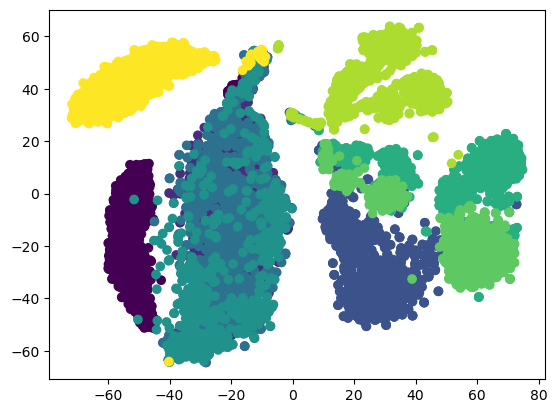

In [64]:
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels_encoded)
plt.show()

#usually takes 16 seconds


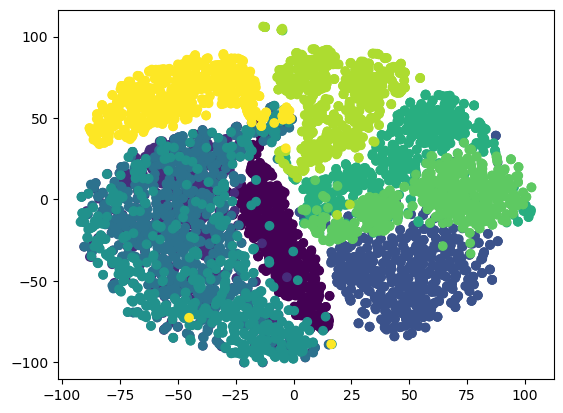

In [95]:
tsne_perp5 = TSNE(n_components=2, perplexity=5, random_state=1216)
tsne_data_perp5 = tsne_perp5.fit_transform(pca_data)
plt.scatter(tsne_data_perp5[:, 0], tsne_data_perp5[:, 1], c=labels_encoded)
plt.show()


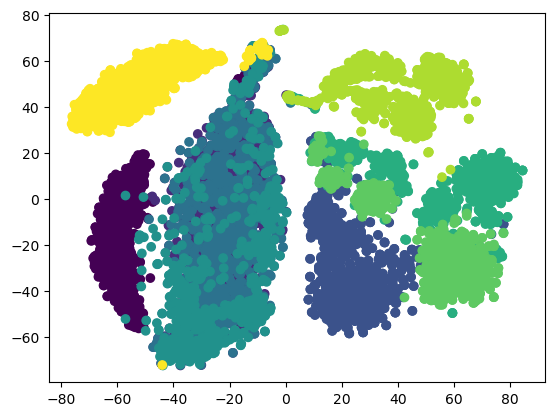

In [66]:
tsne_perp20 = TSNE(n_components=2, perplexity=20, random_state=1216)
tsne_data_perp20 = tsne_perp20.fit_transform(pca_data)
plt.scatter(tsne_data_perp20[:, 0], tsne_data_perp20[:, 1], c=labels_encoded)
plt.show()

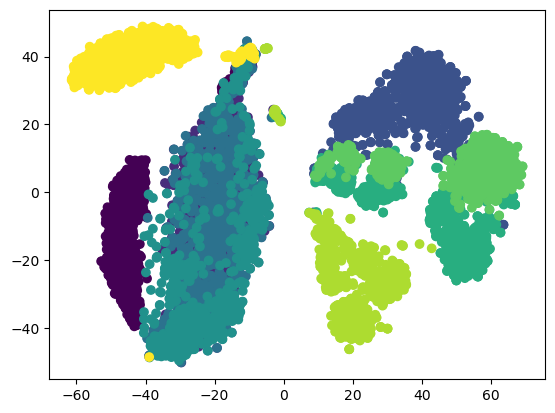

In [67]:
tsne_perp50 = TSNE(n_components=2, perplexity=50, random_state=1216)
tsne_data_perp50 = tsne_perp50.fit_transform(pca_data)
plt.scatter(tsne_data_perp50[:, 0], tsne_data_perp50[:, 1], c=labels_encoded)
plt.show()

After looking at our results for t-SNE, we switch to UMAP in attempt to find a better representation of the data. 

c:\Users\kavan\anaconda3\envs\COGS118B\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


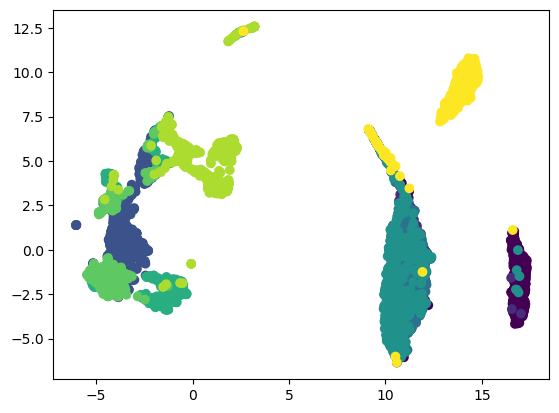

In [92]:
umap5 = UMAP(min_dist=0.1, n_neighbors=5, metric="euclidean", random_state=1216)
umap_data5 = umap5.fit_transform(X)
plt.scatter(umap_data5[:, 0], umap_data5[:, 1], c=labels_encoded)
plt.show()

c:\Users\kavan\anaconda3\envs\COGS118B\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


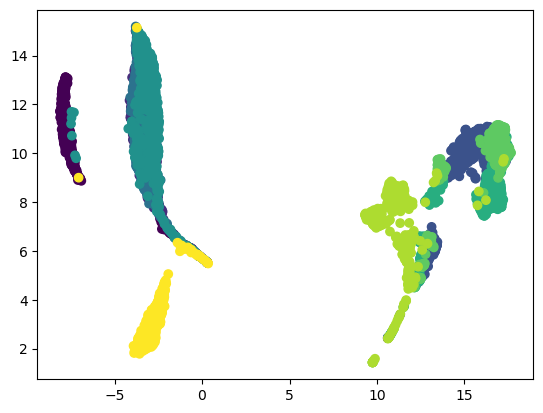

In [90]:
umap10 = UMAP(min_dist=0.1, n_neighbors=10, metric="euclidean", random_state=1216)
umap_data10 = umap10.fit_transform(X)
plt.scatter(umap_data10[:, 0], umap_data10[:, 1], c=labels_encoded)
plt.show()

c:\Users\kavan\anaconda3\envs\COGS118B\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


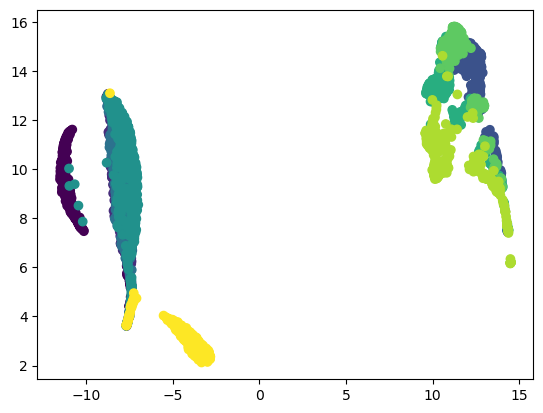

In [91]:
umap20 = UMAP(min_dist=0.1, n_neighbors=20, metric="euclidean", random_state=1216)
umap_data20 = umap20.fit_transform(X)
plt.scatter(umap_data20[:, 0], umap_data20[:, 1], c=labels_encoded)
plt.show()

c:\Users\kavan\anaconda3\envs\COGS118B\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


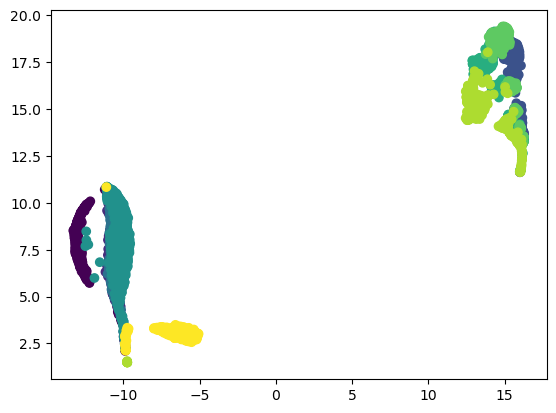

In [93]:
umap40 = UMAP(min_dist=0.1, n_neighbors=40, metric="euclidean", random_state=1216)
umap_data40 = umap40.fit_transform(X)
plt.scatter(umap_data40[:, 0], umap_data40[:, 1], c=labels_encoded)
plt.show()

While UMAP doesn't differentiate the clusters that well, something something west vs east 

With respect to PCA, t-SNE, and UMAP, we believe that the best representation of the data is the t-SNE perplexity 5 representation. 

In [ ]:
kmeans = KMeans(init="k-means++", n_clusters=9)
kmeans.fit(umap_data)

# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

Since this dataset is open-source, and–therefore–permitted for public use, it's certain that the voices in the Common Voice dataset consented to be included; as a result, subjects included in the observations have informed consent. However, a identity concern may be the `filename` variable included in each observation, as they may include some identifying information of each user (e.g. their user IDs). To mitigate this problem, we won't include the `filename` variable in our evaluation, as it isn't considered a "critical variable". Excluding this part of the observations shouldn't hurt our outcome, and will protect the identity of each person included in the dataset. </br>

In terms of biases, while the the age demographics of the observations being somewhat normally distributed, with a skew towards the young adult and middle age categories (20-29, 30-39, and 40-49 year olds), there is an *overwhelming* percentage of speakers that are male (45%), cutting female (17%) and other (2%) into a lower split. Despite having a considerable distribution of age, there's definitely collection bias present in this dataset, which may affect our evaluation outcome, as the pitch between the sexes could affect how the accents/locales are predicted. To counter this issue, we'll need to account for this confound when examining our results from the evaluations. </br>

Lastly, to ensure data security and fair usage/viewing, the vectorization of the audio clips to optimize the observations, will further protect the data when completed and deployed on the respective project repository.

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a id="onenote"><a href="#noteone">1. </a></a> Solan, Z., Horn, D., Ruppin, E., & Edelman, S. (2005). Unsupervised learning of natural languages. Proceedings of the National Academy of Sciences, 102(33), 11629-11634. https://doi.org/10.1073/pnas.0409746102<br>
<a id="twonote"><a href="#notetwo">2. </a></a>: Klein, Dan. The unsupervised learning of natural language structure. Stanford:: Stanford University, 2005.<br>
<a id="threenote"><a href="#notethree">3. </a></a>: Najafian, Maryam, et al. "Unsupervised model selection for recognition of regional accented speech." Fifteenth annual conference of the international speech communication association. 2014.<br>
